# Binary Prediction Metrics

As a dataset for introducing binary prediction metrics, we'll use the (real) [Wisconsin Breast Cancer dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names), that is included in the `sklearn` library. The purpose of this prediction is classifying tumors as **benign** or **malignant**.

It uses **logistic regression** as a mechanism for performing the _classification task_. 

## Set up

In [62]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
from sklearn import metrics

# Import the dataset from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert to Pandas dataframe for some exploration
df = pd.DataFrame(columns=data.feature_names, data=data.data)
df.columns = [c.replace(' ', '_') for c in df.columns]
df['outcome'] = data.target

In [63]:
# What is the correlation between each column and the outcome of interest
corrs = df.corr().outcome
corrs.sort_values()

worst_concave_points      -0.793566
worst_perimeter           -0.782914
mean_concave_points       -0.776614
worst_radius              -0.776454
mean_perimeter            -0.742636
worst_area                -0.733825
mean_radius               -0.730029
mean_area                 -0.708984
mean_concavity            -0.696360
worst_concavity           -0.659610
mean_compactness          -0.596534
worst_compactness         -0.590998
radius_error              -0.567134
perimeter_error           -0.556141
area_error                -0.548236
worst_texture             -0.456903
worst_smoothness          -0.421465
worst_symmetry            -0.416294
mean_texture              -0.415185
concave_points_error      -0.408042
mean_smoothness           -0.358560
mean_symmetry             -0.330499
worst_fractal_dimension   -0.323872
compactness_error         -0.292999
concavity_error           -0.253730
fractal_dimension_error   -0.077972
symmetry_error             0.006522
texture_error              0

## Data Exploration

This section briefly explores the dataset

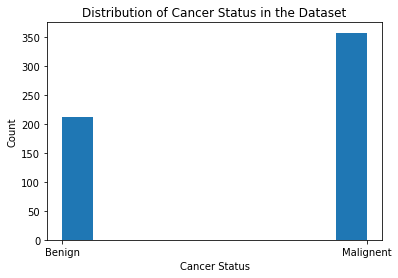

In [64]:
# Distribution of outcomes
plt.hist(df.outcome)
plt.xticks((0, 1), ("Benign", "Malignent"))
plt.xlabel("Cancer Status")
plt.ylabel("Count")
plt.title("Distribution of Cancer Status in the Dataset")
plt.show()

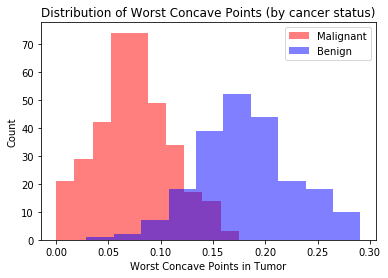

In [65]:
# What is the distribution of "worst_concave_points" (for benign, malignant)?
malignant = df[df.outcome == 1]
benign = df[df.outcome != 1]

# Draw histograms of the distribution
plt.hist(malignant["worst_concave_points"], alpha=0.5, label='Malignant', color="red")
plt.hist(benign["worst_concave_points"], alpha=0.5, label='Benign', color="blue")
plt.legend(loc='upper right')
plt.xlabel("Worst Concave Points in Tumor")
plt.ylabel("Count")
plt.title("Distribution of Worst Concave Points (by cancer status)")
plt.show()

# Using Logistic Regression for Prediction

In [84]:
# Use the `smf.glm` function to fit `outcome` to `worst concave point`
logistic_model = smf.glm(formula = 'outcome ~ worst_concave_points', data=df, family=sm.families.Binomial()).fit()

In [85]:
# Generate a set of predicted probabilities using your model
df['logistic_preds'] = logistic_model.predict()

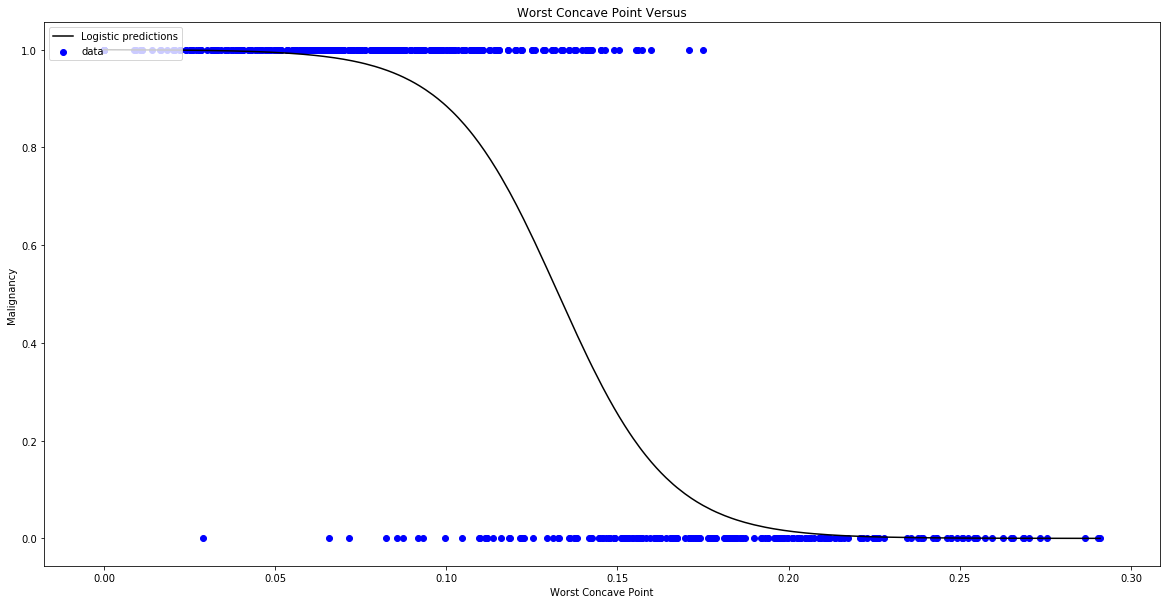

In [86]:
# Visualize the predicted probabilities across balances (bonus: add the observed values as well)
sorted = df.sort_values('worst_concave_points')
plt.figure(figsize=(20,10))
plt.scatter(x=sorted.worst_concave_points, y=sorted.outcome, c="blue", label="data")
plt.plot(sorted.worst_concave_points, sorted.logistic_preds, c="black", label="Logistic predictions")
plt.xlabel("Worst Concave Point")
plt.ylabel("Malignancy")
plt.title("Worst Concave Point Versus")
plt.legend(loc='upper left')
plt.show()

## Evaluation Metrics

### Sensitivity and Specificity
The concepts of sensitivity and specificity express how well your model accurately predicts positive and negative classes. In order to compute these, it is easy to first build a **confusion matrix** to show the total number of cases that were accurately predicted (and those that were not).

  <table>
  <tr>
    <td/>
    <td/>
    <td colspan="2"><em>Predicted Class</em></td>
  </tr>
  <tr>
    <td/>
    <td/>
    <td><strong>Negative (-)</strong></td>
    <td><strong>Positive (+)</strong></td>
    <td><strong>Total</strong></td>
  </tr>
  <tr>
    <td rowspan="2"><em>True Class</em></td>
    <td><strong>Negative (-)</strong></td>
    <td>True Negative (TN)</td>
    <td>False Positives (FP)</td>
    <td>Total non-cases (N)</td>
  </tr>
  <tr>
    <td><strong>Positive (+)</strong></td>
    <td>False Negatives (FN)</td>
    <td>True Positives (TP)</td>
    <td>Total cases (P)</td>
  </tr>
</table>


In the matrix above, the rows represent the **data**, while the columns represent the **predictions**. For example, the top left cell (_True Negatives_) represents the number of instances in which someone did not default, and the model predicted that they did not default. Here are the definitions of each cell:

- **True Positives**: The instances in which your model **predicts** a case (and the case **is true** in the data)
- **False Positives**: The instances in which your model **predicts** a case (and the case **is not** true in the data)
- **False Negatives**: The instances in which your model **does not** predict a case (and the case **is true** in the data)
- **True Negatives**: The instances in which your model **does not** predict a case (and the case **is not** true in the data)

Using those values, we can compute the **sensitivity** and **specificity** of our model:

\begin{equation*}
Sensitivity = \frac { True Positives }{ True Positives+False Negatives } 
\end{equation*}

\begin{equation*}
Specificity = \frac { TrueNegatives }{ TrueNegatives+FalsePositives } 
\end{equation*}

These two metrics lend important insights regarding the quality of our model:

> _**Sensitivity**_, also referred to as the _true positive rate_, tells us, of all of the **cases in the data**, how many did we accurately predict? This indicates the model's **ability to detect cases**. In other words, how **sensitively** does the model pick up on cases?

> _**Specificity**_, also referred to as the _true negative rate_, tells us, of all of the **non-cases in the data**, how many did we accurately predict? This indicates the model's ability to assign non-cases.

These metrics are directly used to calculate **Type I and Type II error rate**, which are analagous to Type I and Type II errors in statistical tests (incorrectly reject a true null hypothesis, incorrectly accept a false null hypothesis). 

> **Type I Error** rate is the proportion of instances which are **incorrectly classified as positive cases** (relative to the total number of **negative cases**). It is calculated as $1-specificity$, or simply the false positives relative to the total non-cases in the data, $FP/N$.

> **Type II Error** rate is the proportion of instances which are **incorrectly classified as negative cases** (relative to the total number of **positive cases**). It is calculated as $1-sensitivity$, or simply the false negatives relative to the total cases in the data, $FN/P$.


# Metric Calculation (15 minutes)

In this section, you'll evaluate the fit of your model by calculating the following:

- First, using a threshold of .5, use your model to predict a binary outcome (each case as 0 or 1)
- What is the **accuracy** of your model (how often does the prediction match the data)?
- What are the sensitivity, specificity, Type I error rate, and Type II error rates?

In [87]:
# First, using a threshold of .5, use your model to predict a binary outcome (each case as 0 or 1)
df['binary_preds'] = np.where(df.logistic_preds > .5, 1, 0)

In [88]:
# What is the accuracy of your model (how often does the prediction match the data)?
(df.binary_preds == df.outcome).sum()/df.shape[0] # 91% accurate!

0.9086115992970123

In [89]:
# What are the sensitivity, specificity, Type I error rate, and Type II error rates?
cm = metrics.confusion_matrix(df.outcome, df.binary_preds)
true_pos = cm[1,1]
false_pos = cm[0,1]
true_neg = cm[0,0]
false_neg = cm[1,0]

# Sensitivity, specificity, and error rates
sensitivity = true_pos / (true_pos + false_neg)
specificity = true_neg / (true_neg + false_pos)
type_one_error = 1 - specificity
type_two_error = 1 - sensitivity
print("Sensitivity:", sensitivity, "Specificity", specificity)

Sensitivity: 0.9299719887955182 Specificity 0.8726415094339622


What is your interpretation of these values?

> The model is really good at predicting _who will not default_ (specificity). It has a Type I error rate of .4%. However, it is **really bad** at predicting _who will default_. The Type II error rate is 70% (meaning that it does not discover 70% of cases!). Note, the accuracy seems quite impressive -- it can accurately interpret **95%** of cases. However, recall that only **3%** of cases defaulted. This means that a naive model that predicts **no one defaults** would have an accuracy of **97%**. We can choose a specific threshold (default is .5) and assess the sensitivity and specificity of our model.

## ROC Curve (10 minutes)

It is common to compare the _true positive rate_ (sensitivity) to the _false positive rate_ (1 - specificity) at each **threshold** for classification in an [ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). This [interactive visualization](http://www.navan.name/roc/) may help you better understand the relationship between thresholds and the ROC. In this section, you'll do the following:

- Generate data for the ROC curve using the `metrics.roc_curve` function
- Draw your ROC curve
- Calculate the area under your ROC curve using the `metrics.roc_auc_curve` function

In [96]:
# Generate data for the ROC curve using the `metrics.roc_curve` function
fpr, tpr, thresholds  = metrics.roc_curve(df.outcome, df.logistic_preds)

Text(0,0.5,'True Positive Rate')

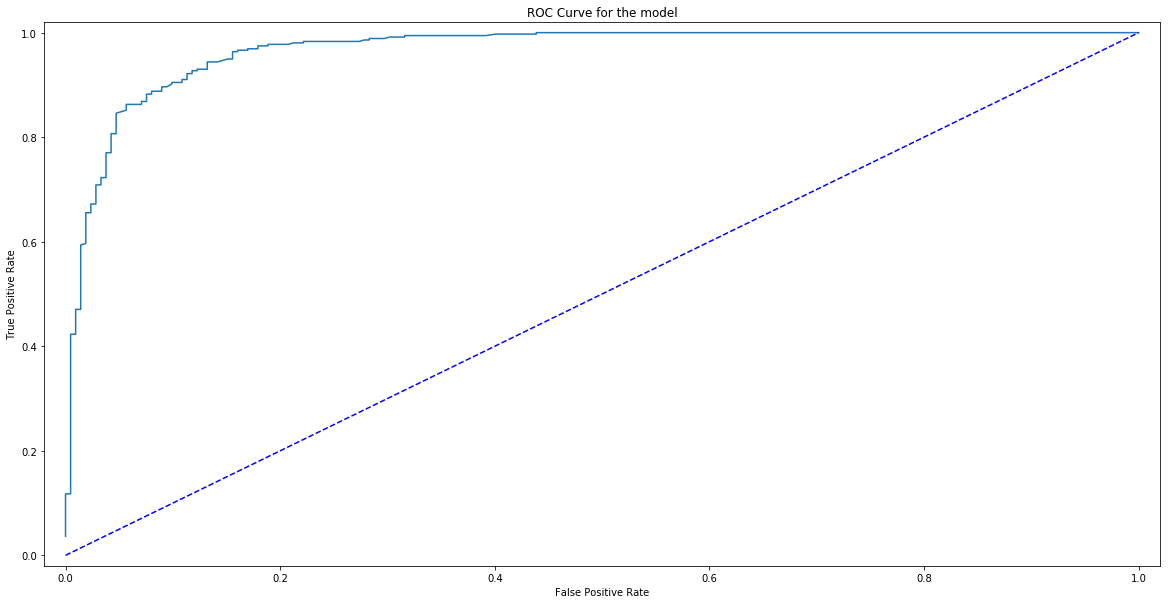

In [97]:
# Draw your ROC curve
plt.figure(figsize=(20,10))
plt.title("ROC Curve for the model")
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'b--')
plt.axis([-.02,1.02, -.02,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [113]:
# Calculate the area under your ROC curve using the metrics.roc_auc_curve function
metrics.roc_auc_score(df.outcome, df.binary_preds)

0.9013067491147403

In [114]:
# Write data
df.to_csv("public/data/cancer_data.csv", index=False)

In [110]:
roc_data = pd.DataFrame({"fpr":fpr, "trp":tpr, "thresholds":thresholds})

In [112]:
roc_data.to_csv("public/data/roc_data.csv", index=False)